In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#test_df = pd.read_csv("./input/test.csv")
train_df = pd.read_csv("./data/train.csv")
#sample_submission_df = pd.read_csv("./input/sample_submission.csv")

In [4]:
train_df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


In [5]:
train_df.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A709385,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [6]:
train_df.keys()

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [7]:
train_df.shape

(26729, 10)

In [8]:
train_df["OutcomeType"].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [9]:
train_df["OutcomeSubtype"].value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

### Subtype 분류 유추  ( 이름, 성향(posi / neu / nega ), 의미유추 )
- Partner, p, 파트너에게 양도
- Foster, p, 일시적 양육 및 치료회복을 위한 제도  ->  모두 입양됨.
- SCRP, neu, stray cat return program 야생고양이 중성화 정책
- Suffering, n, 심함 고통중
- Aggressive, n, 공격적 성향
- Offsite, n, 시각장애
- Rabies Risk, n, 광견병 위험군


- In Kennel, neu, 장안에 따로 둠.
- Behavior, ?, 동물행동?
- Medical, neu, 병원 치료중
- In Foster, p, Foster 제도로 일시적 양육중.
- Enroute, neu, 이동중
- Court/Investigation, n, 재판 및 수사로 인해 보호중
- At Vet, neu, 수의사에게 있음
- In Surgery, neu, 수술 중
- Barn, neu?, 밖에서 키우는 중(?)

#### 추가 분석 요구됨

In [10]:
train_df["AnimalType"].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

In [11]:
train_df["SexuponOutcome"].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [12]:
train_df["AgeuponOutcome"].value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
7 months      288
9 years       288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
6 days         50
4 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

In [13]:
train_df["Color"].value_counts()

Black/White                2824
Black                      2292
Brown Tabby                1635
Brown Tabby/White           940
White                       931
Brown/White                 884
Orange Tabby                841
Tan/White                   773
Tricolor                    752
Blue/White                  702
Black/Tan                   672
White/Black                 643
Brown                       639
Tan                         628
White/Brown                 569
Tortie                      530
Calico                      517
Orange Tabby/White          455
Blue                        450
Brown Brindle/White         450
Black/Brown                 436
Blue Tabby                  433
White/Tan                   389
Red                         337
Torbie                      335
Brown/Black                 333
Red/White                   331
Blue Tabby/White            241
Brown Brindle               232
Chocolate/White             224
                           ... 
Silver/R

    - 10개의 Column
        - AnimalID, Name, DateTime, OutcomeType, OutcomeSubtype, 
        - AnimalType, SexuponOutcome, AgeuponOutcome, Breed, Color
    1. 각 동물은 AnimalID 라는 고유의 값을 가짐
    2. Name에 NaN 값이 존재
    3. DateTime
    4. OutcomeType은 5가지
        - Adoption, Transfer, Return_to_owner, Euthanasia, Died
    5. OutcomeSubtype은 16가지
        - NaN 존재
    6. AnimalType은 2가지
        - Dog, Cat
    7. SexuponOutcome은 4가지
        - Neutered Male(중성화 수컷), Spayed Female(중성화 암컷), Intact Male(수컷), Intact Female(암컷)
    8. AgeuponOutcome은 매우 다양
    9. Breed(품종), 1380종
    10. Color
    
    
- 전처리 필요한 변수들
    - DateTime
    - AgeuponOutcome
        - 일수로 바꾸어 계산이 필요
    - Breed
        - 크기(소/중/대), 품종(순종/믹스), 장/단모 등
    - Color
        - Color별 분류 기준 수립 필요
        
        
    - \*SexuponOutcome
        - 중성화여부 (중성화 / 비중성화), 성별 (male, female)
        

- \*변수별 고려사항
    - Name: 이름 / NaN
    - DateTime: ?
    - OutcomeSubtype: ...
    - AnimalType: Dog & Cat (나눠서 볼것인가?)
    - SexuponOutcome: 중성화여부, 성별
    - AgeuponOutcome: 나이대별 categorization? & NaN 값 분석
    - Breed: ...
    - Color: ?

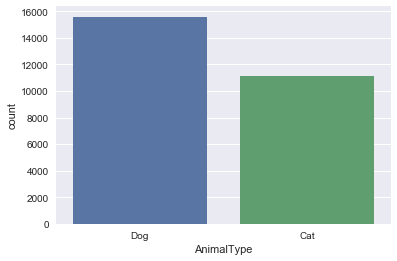

In [14]:
sns.countplot(train_df.AnimalType)

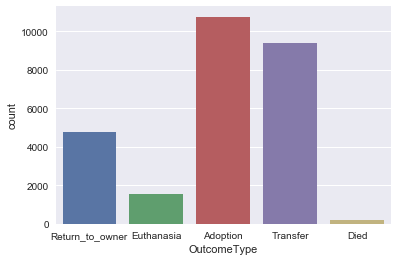

In [15]:
sns.countplot(train_df.OutcomeType)

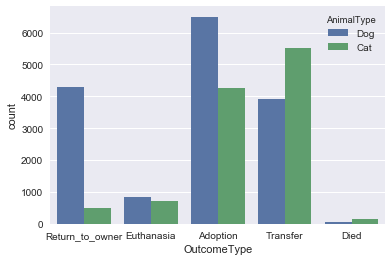

In [16]:
sns.countplot(train_df.OutcomeType, hue=train_df.AnimalType)

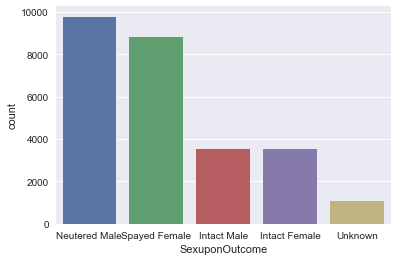

In [17]:
sns.countplot(train_df.SexuponOutcome)

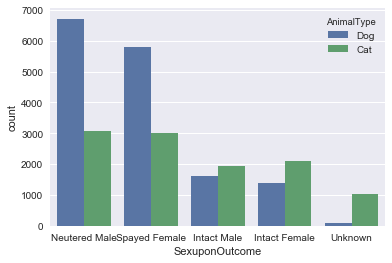

In [18]:
sns.countplot(train_df.SexuponOutcome, hue=train_df.AnimalType)

성별 column과 중성화 column 추가

In [19]:
# functions to get new parameters from the column
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'

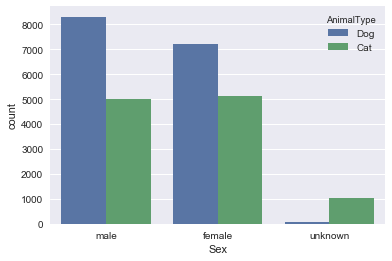

In [20]:
train_df['Sex'] = train_df.SexuponOutcome.apply(get_sex)
train_df['Neutered'] = train_df.SexuponOutcome.apply(get_neutered)
#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.countplot(train_df.Sex, hue=train_df.AnimalType)

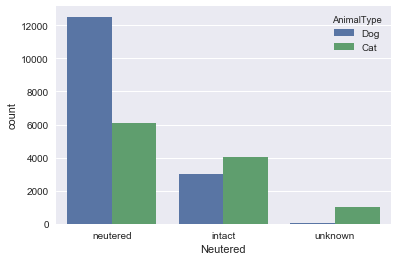

In [21]:
sns.countplot(train_df.Neutered, hue=train_df.AnimalType)

In [22]:
# 이름과 subtype 전처리
train_df['Name'] = train_df['Name'].replace(np.nan, 'Unknown', regex=True)
train_df['OutcomeSubtype'] = train_df['OutcomeSubtype'].replace(np.nan, 'None', regex=True)
train_df['AgeuponOutcome'] = train_df['AgeuponOutcome'].replace(np.nan, '0 days', regex=True)

In [23]:
# AgeuponOutcome -> 일수로 변경
from pandas import Series
byday = []

for i in train_df['AgeuponOutcome']:
    i = str(i)
    num, unit = i.split(' ')
    if unit == 'day' or unit == 'days':
        num = int(num) * 1
    elif unit == 'week' or unit == 'weeks':
        num = int(num) * 7
    elif unit == 'month' or unit == 'months':
        num = int(num) * 30
    else:
        num = int(num) * 365
    byday.append(num)

train_df['AgebyDay'] = Series(byday)

In [24]:
# AgeuponOutcome = NaN, 0 days 인 경우 분석
train_df[train_df['AgeuponOutcome'] == '0 days']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay
2480,A720674,Unknown,2016-02-16 10:17:00,Transfer,SCRP,Cat,Intact Male,0 days,Domestic Shorthair Mix,Blue Tabby/White,male,intact,0
2912,A720973,Unknown,2016-02-18 19:07:00,Transfer,SCRP,Cat,Unknown,0 days,Domestic Shorthair Mix,Gray Tabby,unknown,unknown,0
3766,A720820,Unknown,2016-02-16 18:55:00,Transfer,SCRP,Cat,Intact Female,0 days,Domestic Shorthair Mix,Brown Tabby,female,intact,0
3875,A721076,Unknown,2016-02-20 16:37:00,Euthanasia,Suffering,Dog,Intact Male,0 days,Toy Poodle Mix,White,male,intact,0
4498,A720422,Unknown,2016-02-09 19:43:00,Transfer,SCRP,Cat,Intact Female,0 days,Domestic Shorthair Mix,Brown Tabby,female,intact,0
5137,A720697,Unknown,2016-02-16 10:17:00,Transfer,SCRP,Cat,Spayed Female,0 days,Domestic Shorthair Mix,Black,female,neutered,0
5691,A720640,Unknown,2016-02-16 10:17:00,Transfer,SCRP,Cat,Unknown,0 days,Domestic Shorthair Mix,Black Tabby/White,unknown,unknown,0
7005,A720636,Unknown,2016-02-16 10:17:00,Transfer,SCRP,Cat,Unknown,0 days,Domestic Shorthair Mix,Black,unknown,unknown,0
8420,A720701,Unknown,2016-02-16 10:16:00,Transfer,SCRP,Cat,Intact Male,0 days,Domestic Shorthair Mix,Blue Tabby/White,male,intact,0
17464,A720782,Unknown,2016-02-16 18:55:00,Transfer,SCRP,Cat,Intact Female,0 days,Domestic Shorthair Mix,Torbie,female,intact,0


AgeuponOutcome = NaN, 0 days 인 경우, 주요 특징 
    - AnimalType = cat   (dog 1마리 안락사)
    - Breed = Domestic Shorthair Mix  (cat 1마리 안락사는 longhair, dog 1마리 제외)
    - OutcomeSubtype = SCRP  ->  야생고양이  (안락사된 cat 1마리와 dog 1마리 제외)
    - OutcomeType = Transfer

## 이름 unknow 분석

In [25]:
train_df.shape

(26729, 13)

In [26]:
(train_df['Name'] == 'Unknown').value_counts()

False    19038
True      7691
Name: Name, dtype: int64

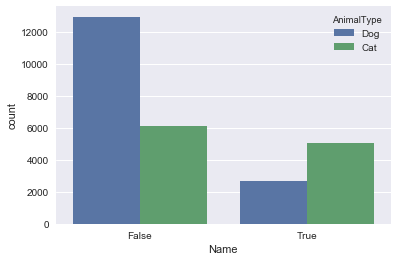

In [27]:
sns.countplot(train_df['Name'] == 'Unknown', hue=train_df.AnimalType)

In [28]:
train_df[train_df['Name'] == 'Unknown']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay
3,A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,male,intact,21
4,A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,male,neutered,730
7,A701489,Unknown,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,unknown,unknown,21
9,A677747,Unknown,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,female,neutered,365
10,A668402,Unknown,2013-12-05 15:50:00,Transfer,SCRP,Cat,Unknown,2 years,Domestic Shorthair Mix,Black,unknown,unknown,730
11,A666320,Unknown,2013-11-04 14:48:00,Adoption,None,Dog,Spayed Female,2 years,Miniature Schnauzer Mix,Silver,female,neutered,730
16,A678050,Unknown,2014-05-03 16:15:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Brown Tabby,male,intact,21
17,A680028,Unknown,2014-06-07 12:54:00,Transfer,Partner,Dog,Intact Female,2 weeks,Pit Bull Mix,Brown/White,female,intact,14
30,A718535,Unknown,2016-01-01 13:57:00,Euthanasia,Suffering,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Calico,female,neutered,1095
32,A682532,Unknown,2014-07-03 17:01:00,Adoption,None,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Torbie,female,neutered,60


In [29]:
# Name 유무 변수 생성

def is_name(x):
    x = str(x)
    if x.find('Unknow') >= 0: return 0
    else: return 1

train_df['isName'] = train_df.Name.apply(is_name)

## plt 연습

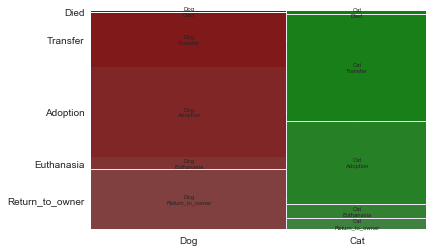

In [30]:
import statsmodels
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 7
mosaic = mosaic(train_df, ['AnimalType', 'OutcomeType'])

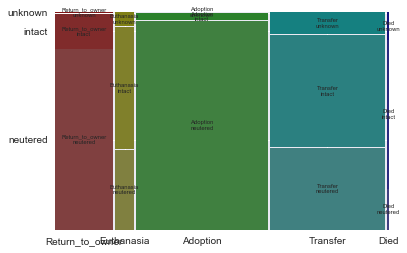

In [31]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 7
mosaic = mosaic(train_df, ['OutcomeType', 'Neutered'])

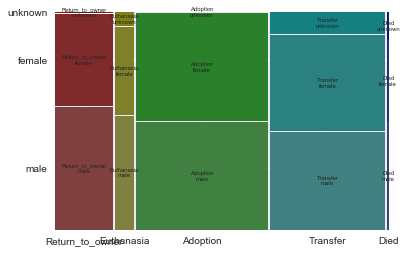

In [32]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 7
mosaic = mosaic(train_df, ['OutcomeType', 'Sex'])

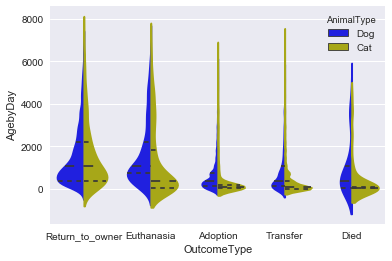

In [33]:
sns.violinplot(x="OutcomeType", y="AgebyDay", hue="AnimalType", data=train_df, split=True,
               inner="quart", palette={"Dog": "b", "Cat": "y"})

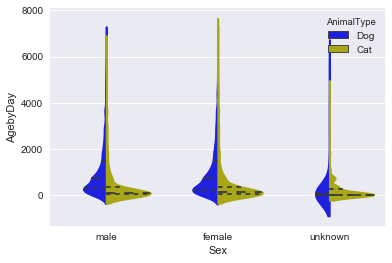

In [34]:
sns.violinplot(x="Sex", y="AgebyDay", hue="AnimalType", data=train_df, split=True,
               inner="quart", palette={"Dog": "b", "Cat": "y"})

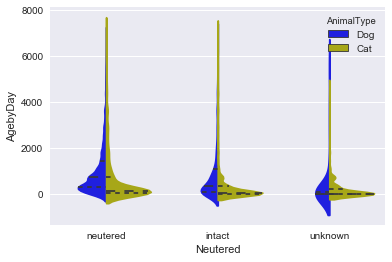

In [35]:
sns.violinplot(x="Neutered", y="AgebyDay", hue="AnimalType", data=train_df, split=True,
               inner="quart", palette={"Dog": "b", "Cat": "y"})

## Color관련 분석

In [36]:
train_df.OutcomeType.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [69]:
print(train_df[train_df.OutcomeType == 'Adoption'].Color.value_counts().sum())
print(len(train_df[train_df.OutcomeType == 'Adoption'].Color.value_counts()))
train_df[train_df.OutcomeType == 'Adoption'].Color.value_counts()

10769
260


Black/White                 1183
Black                        843
Brown Tabby                  614
Brown/White                  375
Brown Tabby/White            366
Tan/White                    351
White                        341
Tricolor                     333
Orange Tabby                 313
Black/Tan                    284
Blue/White                   268
Tan                          255
White/Black                  248
White/Brown                  247
Brown                        237
Tortie                       217
Calico                       205
Orange Tabby/White           200
Black/Brown                  191
Brown Brindle/White          177
Blue Tabby                   168
Blue                         165
White/Tan                    155
Brown/Black                  153
Red/White                    140
Torbie                       129
Red                          118
Blue Tabby/White             108
Sable                        102
Chocolate/White              100
          

In [70]:
print(train_df[train_df.OutcomeType == 'Return_to_owner'].Color.value_counts().sum())
print(len(train_df[train_df.OutcomeType == 'Return_to_owner'].Color.value_counts()))
train_df[train_df.OutcomeType == 'Return_to_owner'].Color.value_counts()

4786
212


Black/White                474
Black                      312
White                      254
Brown/White                226
Tricolor                   196
Black/Tan                  192
Brown                      190
Tan/White                  185
White/Brown                156
Tan                        155
Blue/White                 148
Black/Brown                135
White/Black                128
Brown Brindle/White        126
Red/White                  100
White/Tan                   99
Red                         97
Brown/Black                 83
Yellow                      78
Brown Tabby                 60
Brown Brindle               58
Chocolate/White             57
Buff                        47
Chocolate                   46
Sable                       42
Tan/Black                   42
Cream                       39
Brown Tabby/White           37
Fawn/White                  36
Blue                        36
                          ... 
Red Tick/Tan                 1
Blue/Bro

In [39]:
train_df[train_df.OutcomeType == 'Transfer'].Color.value_counts()

Black/White              980
Black                    972
Brown Tabby              845
Brown Tabby/White        463
Orange Tabby             437
White                    287
Calico                   260
Tortie                   257
Brown/White              230
White/Black              226
Blue/White               222
Blue Tabby               220
Blue                     217
Tricolor                 199
Tan/White                192
Orange Tabby/White       191
Tan                      177
Torbie                   173
Brown                    169
Black/Tan                164
White/Brown              131
White/Tan                114
Brown Brindle/White      110
Blue Tabby/White         105
Red                      104
Black/Brown               90
Cream Tabby               85
Red/White                 74
Brown/Black               69
Lynx Point                67
                        ... 
Silver                     1
Tan/Gray                   1
Cream/Gray                 1
Lynx Point/Gra

In [40]:
# Color 단순화 1단계 '/'제거
from pandas import Series
df2_c = train_df

bymain = []

for i in df2_c['Color']:
    i = str(i)
    if i.find('/') >= 0:
        f, s = i.split('/')
        bymain.append(f)
    else:
        bymain.append(i)

df2_c['newColor'] = Series(bymain)

In [68]:
print(df2_c[df2_c.OutcomeType == 'Adoption'].newColor.value_counts().sum())
print(len(df2_c[df2_c.OutcomeType == 'Adoption'].newColor.value_counts()))
df2_c[df2_c.OutcomeType == 'Adoption'].newColor.value_counts()

10769
54


Black              2581
White              1298
Brown Tabby         984
Brown               809
Tan                 722
Orange Tabby        513
Blue                454
Tricolor            354
Red                 305
Blue Tabby          278
Brown Brindle       276
Tortie              246
Calico              221
Chocolate           185
Sable               167
Torbie              161
Cream Tabby         123
Buff                120
Lynx Point           85
Blue Merle           81
Cream                79
Yellow               77
Gray                 74
Fawn                 69
Seal Point           64
Flame Point          43
Brown Merle          40
Black Smoke          39
Black Brindle        38
Blue Tick            24
Red Tick             23
Silver Tabby         22
Red Merle            21
Silver               21
Gold                 20
Black Tabby          20
Yellow Brindle       16
Tortie Point         15
Lilac Point          15
Chocolate Point      13
Blue Point           12
Calico Point    

In [67]:
print(df2_c[df2_c.OutcomeType == 'Return_to_owner'].newColor.value_counts().sum())
print(len(df2_c[df2_c.OutcomeType == 'Return_to_owner'].newColor.value_counts()))
df2_c[df2_c.OutcomeType == 'Return_to_owner'].newColor.value_counts()

4786
50


Black              1167
White               798
Brown               525
Tan                 413
Red                 233
Tricolor            210
Blue                196
Brown Brindle       187
Chocolate           133
Brown Tabby          99
Yellow               92
Gray                 72
Sable                71
Buff                 63
Orange Tabby         62
Fawn                 60
Cream                55
Blue Merle           45
Gold                 29
Black Brindle        28
Tortie               27
Blue Tabby           26
Silver               25
Torbie               20
Calico               20
Brown Merle          16
Lynx Point           14
Red Merle            14
Cream Tabby          10
Seal Point            9
Apricot               8
Red Tick              8
Liver                 7
Orange                7
Blue Tick             7
Yellow Brindle        5
Flame Point           4
Tortie Point          3
Blue Cream            3
Gray Tabby            3
Silver Tabby          2
Blue Tiger      

In [43]:
# Color 단순화 2단계 main color로 치환

def get_mainC(x):
    x = str(x)
    if x.find('Black') >= 0: return 'Black'
    if x.find('White') >= 0: return 'White'
    if x.find('Brown') >= 0: return 'Brown'
    if x.find('Orange') >= 0: return 'Orange'
    if x.find('Blue') >= 0: return 'Blue'
    if x.find('Red') >= 0: return 'Red'
    else: return x

df2_c['newColor2'] = df2_c.newColor.apply(get_mainC)

In [65]:
print(df2_c[df2_c.OutcomeType == 'Adoption'].newColor2.value_counts().sum())
print(len(df2_c[df2_c.OutcomeType == 'Adoption'].newColor2.value_counts()))
df2_c[df2_c.OutcomeType == 'Adoption'].newColor2.value_counts()

10769
36


Black              2679
Brown              2110
White              1298
Blue                864
Tan                 722
Orange              521
Tricolor            354
Red                 349
Tortie              246
Calico              221
Chocolate           185
Sable               167
Torbie              161
Cream Tabby         123
Buff                120
Lynx Point           85
Cream                79
Yellow               77
Gray                 74
Fawn                 69
Seal Point           64
Flame Point          43
Silver Tabby         22
Silver               21
Gold                 20
Yellow Brindle       16
Tortie Point         15
Lilac Point          15
Chocolate Point      13
Calico Point         11
Apricot               9
Gray Tabby            8
Liver                 5
Ruddy                 1
Agouti                1
Liver Tick            1
Name: newColor2, dtype: int64

In [66]:
print(df2_c[df2_c.OutcomeType == 'Return_to_owner'].newColor2.value_counts().sum())
print(len(df2_c[df2_c.OutcomeType == 'Return_to_owner'].newColor2.value_counts()))
df2_c[df2_c.OutcomeType == 'Return_to_owner'].newColor2.value_counts()

4786
35


Black              1197
Brown               827
White               798
Tan                 413
Blue                280
Red                 255
Tricolor            210
Chocolate           133
Yellow               92
Gray                 72
Sable                71
Orange               69
Buff                 63
Fawn                 60
Cream                55
Gold                 29
Tortie               27
Silver               25
Calico               20
Torbie               20
Lynx Point           14
Cream Tabby          10
Seal Point            9
Apricot               8
Liver                 7
Yellow Brindle        5
Flame Point           4
Gray Tabby            3
Tortie Point          3
Silver Tabby          2
Agouti                1
Calico Point          1
Liver Tick            1
Lilac Point           1
Chocolate Point       1
Name: newColor2, dtype: int64

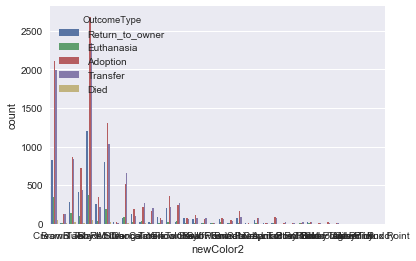

In [52]:
sns.countplot(train_df.newColor2, hue=train_df.OutcomeType)

## OutcomeSubtype분석

### Subtype 분석 결과 ( 이름, 의미 )
- OutcomeSubtype 은 OutcomeType 이전의 상태를 나타내는 것으로 보임.


- Partner, 파트너에게 양도  ->  모두 Transfer
- Foster, 일시적 양육 및 치료회복을 위한 제도  ->  모두 Adoption
- SCRP, stray cat return program 야생고양이 중성화 정책  ->  모두 Transfer, 모두 Cat
- Suffering, 심함 고통겪음  ->  모두 Euthanasia
- Aggressive, 공격적 성향  ->  모두 Euthanasia, 주로 Dog
- Offsite, 시각장애  ->  모두 Adoption
- Rabies Risk, 공수병 위험  ->  모두 Euthanasia


- In Kennel, 장안에 따로 둠.  ->  모두 Died
- Behavior, 동물행동장애  ->  모두 Euthanasia, 모두 Dog
- Medical, 병원 치료중  ->  모두 Euthanasia
- In Foster, Foster 제도로 일시적 양육했음.  ->  모두 Died (아마 치료 중 또는 노령 사망예상)
- Enroute, 이동했음.  ->  모두 Died (이송중 사망 또는 이송했으나 사망)
- Court/Investigation, 재판 및 수사로 인해 보호중   ->  모두 Euthanasia, 모두 Dog
- At Vet, 수의사에게 있었음  ->  모두 Died
- In Surgery, 수술 중  ->  모두 Died
- Barn, 밖에서 키우는 중(?)  ->  Transfer 1, Adoption 1. 모두 고양이

In [132]:
train_df.OutcomeSubtype.value_counts()

None                   13612
Partner                 7816
Foster                  1800
SCRP                    1599
Suffering               1002
Aggressive               320
Offsite                  165
In Kennel                114
Behavior                  86
Rabies Risk               74
Medical                   66
In Foster                 52
Enroute                    8
Court/Investigation        6
At Vet                     4
In Surgery                 3
Barn                       2
Name: OutcomeSubtype, dtype: int64

In [134]:
train_df[train_df.OutcomeSubtype == 'None'].tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
26717,A519949,Bella,2014-06-30 17:34:00,Return_to_owner,None,Dog,Spayed Female,9 years,Bullmastiff Mix,Black,female,neutered,3285,1,Black,Black
26718,A701044,Unknown,2015-04-28 14:26:00,Adoption,None,Dog,Neutered Male,2 months,Siberian Husky/German Shepherd,Black/Tricolor,male,neutered,60,0,Black,Black
26720,A704405,Brownie,2015-07-18 14:08:00,Adoption,None,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Brown Tabby,female,neutered,60,1,Brown Tabby,Brown
26723,A716997,Zeus,2016-01-29 18:52:00,Adoption,None,Dog,Neutered Male,6 years,Staffordshire Mix,Blue/White,male,neutered,2190,1,Blue,Blue
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,None,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,male,neutered,1460,1,White,White


In [84]:
train_df[train_df.OutcomeSubtype == 'Partner']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
3,A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,male,intact,21,0,Blue Cream,Blue
4,A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,male,neutered,730,0,Tan,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,female,intact,30,1,Black,Black
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,male,intact,21,1,Blue Tabby,Blue
7,A701489,Unknown,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,unknown,unknown,21,0,Brown Tabby,Brown
16,A678050,Unknown,2014-05-03 16:15:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Brown Tabby,male,intact,21,0,Brown Tabby,Brown
17,A680028,Unknown,2014-06-07 12:54:00,Transfer,Partner,Dog,Intact Female,2 weeks,Pit Bull Mix,Brown/White,female,intact,14,0,Brown,Brown
18,A679010,Chrissy,2014-05-17 11:32:00,Transfer,Partner,Cat,Intact Female,2 years,Angora Mix,White,female,intact,730,1,White,White
20,A670658,Anders,2014-01-19 15:03:00,Transfer,Partner,Dog,Intact Male,2 months,Queensland Heeler Mix,Black/White,male,intact,60,1,Black,Black
21,A708812,Munchkin,2015-09-18 15:19:00,Transfer,Partner,Cat,Spayed Female,1 year,Domestic Shorthair Mix,White,female,neutered,365,1,White,White


In [85]:
train_df[train_df.OutcomeSubtype == 'Partner'].OutcomeType.value_counts()

Transfer    7816
Name: OutcomeType, dtype: int64

In [90]:
train_df[train_df.OutcomeSubtype == 'Partner'].AnimalType.value_counts()

Dog    3911
Cat    3905
Name: AnimalType, dtype: int64

In [94]:
train_df[train_df.OutcomeSubtype == 'Partner'].isName.value_counts()

1    4436
0    3380
Name: isName, dtype: int64

In [87]:
train_df[train_df.OutcomeSubtype == 'Foster']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,male,neutered,730,1,Blue,Blue
12,A684601,Rocket,2016-02-03 11:27:00,Adoption,Foster,Dog,Neutered Male,4 years,Pit Bull Mix,Brown,male,neutered,1460,1,Brown,Brown
15,A678825,Oliver,2014-07-12 12:10:00,Adoption,Foster,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Orange Tabby/White,male,neutered,90,1,Orange Tabby,Orange
80,A700740,Charlie,2015-12-17 12:10:00,Adoption,Foster,Dog,Neutered Male,1 year,Chihuahua Shorthair,White,male,neutered,365,1,White,White
86,A704754,Arthur,2015-07-18 15:37:00,Adoption,Foster,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,male,neutered,60,1,Black,Black
94,A688443,Thelma,2014-12-29 15:11:00,Adoption,Foster,Cat,Spayed Female,4 months,Domestic Shorthair Mix,Black,female,neutered,120,1,Black,Black
139,A689601,Abby,2014-11-23 18:55:00,Adoption,Foster,Dog,Spayed Female,1 month,Miniature Pinscher/Chihuahua Shorthair,Tricolor,female,neutered,30,1,Tricolor,Tricolor
150,A707896,Tokyo,2016-02-19 14:58:00,Adoption,Foster,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby,male,neutered,730,1,Brown Tabby,Brown
159,A714069,Jupiter,2015-12-16 11:28:00,Adoption,Foster,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black Tabby/White,male,neutered,60,1,Black Tabby,Black
161,A717167,Oscar,2016-01-23 16:05:00,Adoption,Foster,Cat,Neutered Male,4 years,Domestic Shorthair Mix,Black/White,male,neutered,1460,1,Black,Black


In [88]:
train_df[train_df.OutcomeSubtype == 'Foster'].OutcomeType.value_counts()

Adoption    1800
Name: OutcomeType, dtype: int64

In [91]:
train_df[train_df.OutcomeSubtype == 'Foster'].AnimalType.value_counts()

Cat    1095
Dog     705
Name: AnimalType, dtype: int64

In [93]:
train_df[train_df.OutcomeSubtype == 'Foster'].isName.value_counts()

1    1542
0     258
Name: isName, dtype: int64

In [76]:
train_df[train_df.OutcomeSubtype == 'SCRP']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
10,A668402,Unknown,2013-12-05 15:50:00,Transfer,SCRP,Cat,Unknown,2 years,Domestic Shorthair Mix,Black,unknown,unknown,730,0,Black,Black
43,A671181,Unknown,2014-01-21 15:15:00,Transfer,SCRP,Cat,Intact Male,4 years,Domestic Longhair Mix,Black/White,male,intact,1460,0,Black,Black
50,A684050,Unknown,2014-07-28 09:00:00,Transfer,SCRP,Cat,Intact Female,1 year,Domestic Shorthair Mix,Tortie,female,intact,365,0,Tortie,Tortie
68,A705258,Unknown,2015-06-16 09:00:00,Transfer,SCRP,Cat,Unknown,2 months,Domestic Shorthair Mix,Brown Tabby/White,unknown,unknown,60,0,Brown Tabby,Brown
79,A717839,Unknown,2015-12-20 19:38:00,Transfer,SCRP,Cat,Spayed Female,2 years,Domestic Shorthair Mix,Black/White,female,neutered,730,0,Black,Black
83,A713690,Unknown,2015-10-12 09:00:00,Transfer,SCRP,Cat,Intact Male,2 years,Domestic Shorthair Mix,Blue Tabby,male,intact,730,0,Blue Tabby,Blue
98,A690658,Unknown,2014-10-24 09:00:00,Transfer,SCRP,Cat,Intact Male,3 years,Domestic Shorthair Mix,Black/White,male,intact,1095,0,Black,Black
127,A686520,Unknown,2014-08-24 09:00:00,Transfer,SCRP,Cat,Intact Male,3 months,Domestic Shorthair Mix,Brown Tabby,male,intact,90,0,Brown Tabby,Brown
137,A681481,Unknown,2014-06-18 09:00:00,Transfer,SCRP,Cat,Intact Female,2 years,Domestic Shorthair Mix,Blue/White,female,intact,730,0,Blue,Blue
138,A714177,Unknown,2015-10-20 09:00:00,Transfer,SCRP,Cat,Unknown,3 months,Domestic Shorthair Mix,Tortie,unknown,unknown,90,0,Tortie,Tortie


In [80]:
train_df[train_df.OutcomeSubtype == 'SCRP'].OutcomeType.value_counts()

Transfer    1599
Name: OutcomeType, dtype: int64

In [78]:
train_df[train_df.OutcomeSubtype == 'SCRP'].AnimalType.value_counts()

Cat    1599
Name: AnimalType, dtype: int64

In [96]:
train_df[train_df.OutcomeSubtype == 'Suffering']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,female,neutered,365,1,Cream Tabby,Cream Tabby
30,A718535,Unknown,2016-01-01 13:57:00,Euthanasia,Suffering,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Calico,female,neutered,1095,0,Calico,Calico
35,A668626,Unknown,2013-12-06 14:55:00,Euthanasia,Suffering,Dog,Intact Male,3 years,Labrador Retriever Mix,Yellow,male,intact,1095,0,Yellow,Yellow
61,A678506,Prec Punkin',2014-05-09 18:07:00,Euthanasia,Suffering,Dog,Spayed Female,11 years,Yorkshire Terrier Mix,Brown/Black,female,neutered,4015,1,Brown,Brown
77,A675021,Unknown,2014-03-21 17:09:00,Euthanasia,Suffering,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico,female,intact,365,0,Calico,Calico
81,A712376,Unknown,2015-09-22 12:10:00,Euthanasia,Suffering,Cat,Unknown,2 weeks,Domestic Shorthair Mix,Blue Tabby,unknown,unknown,14,0,Blue Tabby,Blue
84,A691838,Avaddon,2015-02-09 17:17:00,Euthanasia,Suffering,Dog,Neutered Male,12 years,Pit Bull Mix,Brown Brindle,male,neutered,4380,1,Brown Brindle,Brown
115,A695971,Unknown,2015-01-26 16:23:00,Euthanasia,Suffering,Cat,Intact Male,6 years,Domestic Shorthair Mix,Orange Tabby,male,intact,2190,0,Orange Tabby,Orange
123,A691968,Unknown,2014-11-14 11:57:00,Euthanasia,Suffering,Cat,Intact Female,7 years,Domestic Shorthair Mix,Tortie,female,intact,2555,0,Tortie,Tortie
203,A702207,Unknown,2015-05-10 17:16:00,Euthanasia,Suffering,Cat,Neutered Male,12 years,Domestic Longhair Mix,Orange Tabby/White,male,neutered,4380,0,Orange Tabby,Orange


In [97]:
train_df[train_df.OutcomeSubtype == 'Suffering'].OutcomeType.value_counts()

Euthanasia    1002
Name: OutcomeType, dtype: int64

In [98]:
train_df[train_df.OutcomeSubtype == 'Suffering'].AnimalType.value_counts()

Cat    652
Dog    350
Name: AnimalType, dtype: int64

In [99]:
train_df[train_df.OutcomeSubtype == 'Aggressive']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
49,A666092,Unknown,2013-10-30 15:37:00,Euthanasia,Aggressive,Dog,Intact Male,6 years,Pit Bull/Labrador Retriever,Chocolate/White,male,intact,2190,0,Chocolate,Chocolate
93,A676680,Hero,2015-02-06 18:56:00,Euthanasia,Aggressive,Dog,Spayed Female,2 years,German Shepherd Mix,Black/Tan,female,neutered,730,1,Black,Black
111,A657753,Wiz,2013-12-06 16:53:00,Euthanasia,Aggressive,Dog,Neutered Male,1 year,Chihuahua Shorthair/Dachshund,Yellow Brindle/White,male,neutered,365,1,Yellow Brindle,Yellow Brindle
227,A487470,Midnight,2014-01-20 18:40:00,Euthanasia,Aggressive,Dog,Neutered Male,9 years,Labrador Retriever/Pit Bull,Black,male,neutered,3285,1,Black,Black
300,A674659,Unknown,2014-03-21 17:10:00,Euthanasia,Aggressive,Dog,Intact Male,2 years,Labrador Retriever/Great Dane,Tan/Black,male,intact,730,0,Tan,Tan
373,A678099,Spartacus,2015-06-10 17:23:00,Euthanasia,Aggressive,Dog,Neutered Male,2 years,Akita/Pit Bull,Tan/White,male,neutered,730,1,Tan,Tan
385,A672744,Oso,2014-04-17 17:09:00,Euthanasia,Aggressive,Dog,Intact Male,3 years,Rottweiler Mix,Black/Tan,male,intact,1095,1,Black,Black
438,A663346,July,2013-11-10 18:25:00,Euthanasia,Aggressive,Dog,Spayed Female,1 year,Pit Bull Mix,Black/White,female,neutered,365,1,Black,Black
589,A673275,Prince,2014-03-19 15:17:00,Euthanasia,Aggressive,Dog,Intact Male,3 years,Pit Bull Mix,Blue Tiger/White,male,intact,1095,1,Blue Tiger,Blue
662,A690256,Mimi,2014-10-30 15:53:00,Euthanasia,Aggressive,Dog,Spayed Female,1 year,Pit Bull Mix,White/Black,female,neutered,365,1,White,White


In [100]:
train_df[train_df.OutcomeSubtype == 'Aggressive'].OutcomeType.value_counts()

Euthanasia    320
Name: OutcomeType, dtype: int64

In [101]:
train_df[train_df.OutcomeSubtype == 'Aggressive'].AnimalType.value_counts()

Dog    317
Cat      3
Name: AnimalType, dtype: int64

In [103]:
train_df[train_df.OutcomeSubtype == 'Offsite']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
9,A677747,Unknown,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,female,neutered,365,0,White,White
122,A688223,Unknown,2014-09-21 14:15:00,Adoption,Offsite,Dog,Spayed Female,2 months,Labrador Retriever Mix,Black/White,female,neutered,60,0,Black,Black
141,A672453,Unknown,2014-02-16 19:38:00,Adoption,Offsite,Cat,Neutered Male,10 months,Domestic Medium Hair Mix,Cream Tabby,male,neutered,300,0,Cream Tabby,Cream Tabby
691,A676524,Chica Loca,2014-05-25 19:31:00,Adoption,Offsite,Cat,Spayed Female,2 months,Domestic Medium Hair Mix,Brown Tabby/White,female,neutered,60,1,Brown Tabby,Brown
946,A667606,Treasure,2014-01-19 16:47:00,Adoption,Offsite,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Torbie,female,neutered,90,1,Torbie,Torbie
1023,A676272,Unknown,2014-06-01 16:09:00,Adoption,Offsite,Cat,Spayed Female,1 month,Domestic Shorthair Mix,Blue,female,neutered,30,0,Blue,Blue
1088,A696866,Jewel,2015-02-21 16:49:00,Adoption,Offsite,Dog,Spayed Female,5 years,Maltese Mix,White,female,neutered,1825,1,White,White
1204,A665072,Moe,2013-12-07 14:57:00,Adoption,Offsite,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Blue,male,neutered,60,1,Blue,Blue
1424,A661986,Smidge,2013-11-13 10:52:00,Adoption,Offsite,Cat,Spayed Female,3 months,Siamese Mix,Flame Point,female,neutered,90,1,Flame Point,Flame Point
1484,A682338,Toto,2014-08-02 20:05:00,Adoption,Offsite,Dog,Neutered Male,1 year,Affenpinscher Mix,Black/White,male,neutered,365,1,Black,Black


In [104]:
train_df[train_df.OutcomeSubtype == 'Offsite'].OutcomeType.value_counts()

Adoption    165
Name: OutcomeType, dtype: int64

In [105]:
train_df[train_df.OutcomeSubtype == 'Offsite'].AnimalType.value_counts()

Dog    101
Cat     64
Name: AnimalType, dtype: int64

In [108]:
train_df[train_df.OutcomeSubtype == 'In Kennel']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
553,A705794,Logan,2015-07-01 09:38:00,Died,In Kennel,Cat,Intact Male,3 weeks,Snowshoe Mix,Seal Point,male,intact,21,1,Seal Point,Seal Point
931,A683992,Unknown,2014-07-22 11:30:00,Died,In Kennel,Dog,Intact Male,3 weeks,Chihuahua Longhair Mix,Black/Brown,male,intact,21,0,Black,Black
2973,A665671,Unknown,2013-10-25 12:49:00,Died,In Kennel,Cat,Intact Female,1 month,Siamese Mix,Seal Point,female,intact,30,0,Seal Point,Seal Point
3195,A702176,Unknown,2015-05-10 18:36:00,Died,In Kennel,Cat,Intact Female,0 years,Domestic Longhair Mix,White/Brown Tabby,female,intact,0,0,White,White
4726,A646914,Jasper,2014-01-28 08:46:00,Died,In Kennel,Dog,Neutered Male,1 year,Pembroke Welsh Corgi/Brittany,Black/White,male,neutered,365,1,Black,Black
4731,A712576,Grayson,2015-10-08 11:43:00,Died,In Kennel,Cat,Intact Male,1 month,Domestic Shorthair Mix,Blue Tabby/White,male,intact,30,1,Blue Tabby,Blue
5070,A709238,Penny,2015-08-15 08:06:00,Died,In Kennel,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Brown Tabby/White,female,intact,30,1,Brown Tabby,Brown
5328,A670064,Unknown,2014-01-03 16:33:00,Died,In Kennel,Dog,Intact Female,3 months,Pit Bull/Pit Bull,Red,female,intact,90,0,Red,Red
5585,A704522,Unknown,2015-06-11 08:21:00,Died,In Kennel,Cat,Intact Male,1 weeks,Domestic Shorthair Mix,Cream,male,intact,7,0,Cream,Cream
5715,A693598,Unknown,2014-12-15 09:28:00,Died,In Kennel,Dog,Intact Male,1 month,Boston Terrier,Black/White,male,intact,30,0,Black,Black


In [106]:
train_df[train_df.OutcomeSubtype == 'In Kennel'].OutcomeType.value_counts()

Died    114
Name: OutcomeType, dtype: int64

In [107]:
train_df[train_df.OutcomeSubtype == 'In Kennel'].AnimalType.value_counts()

Cat    84
Dog    30
Name: AnimalType, dtype: int64

In [110]:
train_df[train_df.OutcomeSubtype == 'Behavior']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
269,A683309,Unknown,2014-07-17 18:06:00,Euthanasia,Behavior,Dog,Spayed Female,7 years,Pit Bull Mix,Tan/White,female,neutered,2555,0,Tan,Tan
621,A683654,Unknown,2014-07-19 10:46:00,Euthanasia,Behavior,Dog,Neutered Male,1 year,Pit Bull Mix,Brown Brindle/White,male,neutered,365,0,Brown Brindle,Brown
771,A694012,Zorro,2014-12-20 14:03:00,Euthanasia,Behavior,Dog,Neutered Male,11 years,Labrador Retriever Mix,Black,male,neutered,4015,1,Black,Black
850,A666197,Leroy,2013-12-19 11:08:00,Euthanasia,Behavior,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,male,neutered,730,1,Blue,Blue
860,A665137,Willie,2013-11-15 14:52:00,Euthanasia,Behavior,Dog,Neutered Male,1 year,Pit Bull Mix,White/Tan,male,neutered,365,1,White,White
1170,A701910,Maia,2015-05-17 16:50:00,Euthanasia,Behavior,Dog,Spayed Female,1 year,American Staffordshire Terrier Mix,Blue/White,female,neutered,365,1,Blue,Blue
1826,A662603,Tucker,2013-11-26 14:06:00,Euthanasia,Behavior,Dog,Neutered Male,2 years,Labrador Retriever Mix,Black,male,neutered,730,1,Black,Black
2523,A698597,Thiago,2015-03-14 18:07:00,Euthanasia,Behavior,Dog,Intact Male,2 years,Australian Kelpie Mix,White/Tricolor,male,intact,730,1,White,White
2768,A666273,Jasmine,2013-11-29 11:12:00,Euthanasia,Behavior,Dog,Spayed Female,2 years,Boxer/Pit Bull,Brown/White,female,neutered,730,1,Brown,Brown
3604,A681431,Deltadawn,2014-06-22 16:46:00,Euthanasia,Behavior,Dog,Intact Female,5 years,Labrador Retriever Mix,Brown,female,intact,1825,1,Brown,Brown


In [111]:
train_df[train_df.OutcomeSubtype == 'Behavior'].OutcomeType.value_counts()

Euthanasia    86
Name: OutcomeType, dtype: int64

In [112]:
train_df[train_df.OutcomeSubtype == 'Behavior'].AnimalType.value_counts()

Dog    86
Name: AnimalType, dtype: int64

In [113]:
train_df[train_df.OutcomeSubtype == 'Rabies Risk']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
457,A700335,Dorchester,2015-07-04 08:56:00,Euthanasia,Rabies Risk,Dog,Neutered Male,2 years,Pit Bull Mix,White/Brown,male,neutered,730,1,White,White
790,A670417,Spot,2014-01-11 09:46:00,Euthanasia,Rabies Risk,Dog,Neutered Male,5 years,Catahoula Mix,Blue Merle/Gray,male,neutered,1825,1,Blue Merle,Blue
829,A503376,Lobo,2015-12-08 11:41:00,Euthanasia,Rabies Risk,Dog,Intact Male,7 years,Siberian Husky Mix,Red/White,male,intact,2555,1,Red,Red
1258,A669977,Zeppo,2014-04-01 15:44:00,Euthanasia,Rabies Risk,Dog,Neutered Male,1 year,American Bulldog Mix,Blue/White,male,neutered,365,1,Blue,Blue
1284,A667153,Unknown,2013-11-13 15:49:00,Euthanasia,Rabies Risk,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White,male,intact,30,0,Black,Black
1877,A715302,Unknown,2015-11-03 15:05:00,Euthanasia,Rabies Risk,Cat,Intact Male,1 year,Domestic Shorthair Mix,Blue,male,intact,365,0,Blue,Blue
2745,A710733,Unknown,2015-08-28 10:58:00,Euthanasia,Rabies Risk,Cat,Intact Female,4 years,Domestic Medium Hair Mix,Black/White,female,intact,1460,0,Black,Black
2995,A717038,Unknown,2015-12-03 08:00:00,Euthanasia,Rabies Risk,Cat,Intact Female,2 years,Domestic Shorthair Mix,White/Blue,female,intact,730,0,White,White
3707,A677564,Unknown,2014-04-26 13:41:00,Euthanasia,Rabies Risk,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Black,male,intact,21,0,Black,Black
3740,A670085,Unknown,2014-01-05 10:41:00,Euthanasia,Rabies Risk,Cat,Intact Male,5 years,Domestic Longhair Mix,Blue/White,male,intact,1825,0,Blue,Blue


In [114]:
train_df[train_df.OutcomeSubtype == 'Rabies Risk'].OutcomeType.value_counts()

Euthanasia    74
Name: OutcomeType, dtype: int64

In [115]:
train_df[train_df.OutcomeSubtype == 'Rabies Risk'].AnimalType.value_counts()

Dog    46
Cat    28
Name: AnimalType, dtype: int64

In [116]:
train_df[train_df.OutcomeSubtype == 'Medical']

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgebyDay,isName,newColor,newColor2
463,A668396,Unknown,2013-12-03 18:11:00,Euthanasia,Medical,Cat,Neutered Male,8 years,Siamese Mix,Lynx Point,male,neutered,2920,0,Lynx Point,Lynx Point
671,A478579,Natasha,2014-03-07 17:35:00,Euthanasia,Medical,Dog,Spayed Female,12 years,Chow Chow Mix,Brown/Tan,female,neutered,4380,1,Brown,Brown
728,A489376,Buster,2015-05-30 15:53:00,Euthanasia,Medical,Dog,Neutered Male,11 years,Boxer Mix,Brown Brindle/White,male,neutered,4015,1,Brown Brindle,Brown
740,A271790,Grant,2014-09-21 16:23:00,Euthanasia,Medical,Dog,Neutered Male,12 years,Harrier Mix,Tricolor,male,neutered,4380,1,Tricolor,Tricolor
997,A664238,Unknown,2013-10-01 16:47:00,Euthanasia,Medical,Cat,Unknown,4 months,American Shorthair Mix,Black/White,unknown,unknown,120,0,Black,Black
1327,A716088,Unknown,2015-11-15 09:17:00,Euthanasia,Medical,Cat,Intact Male,6 months,Domestic Shorthair Mix,Brown Tabby,male,intact,180,0,Brown Tabby,Brown
1415,A647886,Lucy,2015-03-26 12:25:00,Euthanasia,Medical,Dog,Intact Female,10 years,Staffordshire Mix,Red/White,female,intact,3650,1,Red,Red
1743,A672193,Hickory,2014-06-09 13:46:00,Euthanasia,Medical,Cat,Neutered Male,4 months,Domestic Shorthair Mix,Brown Tabby,male,neutered,120,1,Brown Tabby,Brown
1909,A689624,Frank,2014-11-10 11:55:00,Euthanasia,Medical,Dog,Neutered Male,3 years,Pit Bull Mix,White/Blue,male,neutered,1095,1,White,White
2022,A703477,Unknown,2015-05-25 14:05:00,Euthanasia,Medical,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,male,intact,30,0,Brown Tabby,Brown


In [117]:
train_df[train_df.OutcomeSubtype == 'Medical'].OutcomeType.value_counts()

Euthanasia    66
Name: OutcomeType, dtype: int64

In [118]:
train_df[train_df.OutcomeSubtype == 'Medical'].AnimalType.value_counts()

Dog    40
Cat    26
Name: AnimalType, dtype: int64

In [ ]:
train_df[train_df.OutcomeSubtype == 'In Foster']

In [119]:
train_df[train_df.OutcomeSubtype == 'In Foster'].OutcomeType.value_counts()

Died    52
Name: OutcomeType, dtype: int64

In [121]:
train_df[train_df.OutcomeSubtype == 'In Foster'].AnimalType.value_counts()

Cat    45
Dog     7
Name: AnimalType, dtype: int64

In [ ]:
train_df[train_df.OutcomeSubtype == 'Enroute']

In [122]:
train_df[train_df.OutcomeSubtype == 'Enroute'].OutcomeType.value_counts()

Died    8
Name: OutcomeType, dtype: int64

In [123]:
train_df[train_df.OutcomeSubtype == 'Enroute'].AnimalType.value_counts()

Cat    6
Dog    2
Name: AnimalType, dtype: int64

In [ ]:
train_df[train_df.OutcomeSubtype == 'Court/Investigation']

In [124]:
train_df[train_df.OutcomeSubtype == 'Court/Investigation'].OutcomeType.value_counts()

Euthanasia    6
Name: OutcomeType, dtype: int64

In [125]:
train_df[train_df.OutcomeSubtype == 'Court/Investigation'].AnimalType.value_counts()

Dog    6
Name: AnimalType, dtype: int64

In [ ]:
train_df[train_df.OutcomeSubtype == 'At Vet']

In [126]:
train_df[train_df.OutcomeSubtype == 'At Vet'].OutcomeType.value_counts()

Died    4
Name: OutcomeType, dtype: int64

In [127]:
train_df[train_df.OutcomeSubtype == 'At Vet'].AnimalType.value_counts()

Cat    2
Dog    2
Name: AnimalType, dtype: int64

In [ ]:
train_df[train_df.OutcomeSubtype == 'In Surgery']

In [128]:
train_df[train_df.OutcomeSubtype == 'In Surgery'].OutcomeType.value_counts()

Died    3
Name: OutcomeType, dtype: int64

In [129]:
train_df[train_df.OutcomeSubtype == 'In Surgery'].AnimalType.value_counts()

Dog    3
Name: AnimalType, dtype: int64

In [ ]:
train_df[train_df.OutcomeSubtype == 'Barn']

In [130]:
train_df[train_df.OutcomeSubtype == 'Barn'].OutcomeType.value_counts()

Transfer    1
Adoption    1
Name: OutcomeType, dtype: int64

In [131]:
train_df[train_df.OutcomeSubtype == 'Barn'].AnimalType.value_counts()

Cat    2
Name: AnimalType, dtype: int64

### Breed변수 어떻게 다룰지 논의 필요,